In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the Iris dataset
iris = pd.read_csv('Iris.csv')
iris.drop(['Id'],axis=1, inplace=True)
X = iris.drop(['Species'], axis = 1)
y = iris.Species

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# train set
train_set = pd.concat([X_train, y_train], axis=1)
train_set.to_csv('train_iris_knn')
# test set
test_set = pd.concat([X_test, y_test], axis=1) 
test_set.to_csv('test_iris_knn')

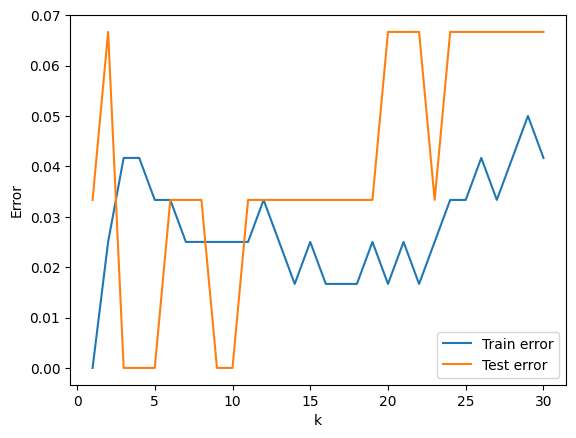

In [16]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

train_errors = []
test_errors = []

for k in range(1, 31):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_errors.append(1 - knn.score(X_train, y_train))
    test_errors.append(1 - knn.score(X_test, y_test))

plt.plot(range(1, 31), train_errors, label='Train error')
plt.plot(range(1, 31), test_errors, label='Test error')
plt.xlabel('k')
plt.ylabel('Error')
plt.legend()
plt.show()

In [17]:
new_data = [[6.2, 3.0, 4.5, 1.8], [5.2, 3.0, 2.5, 0.9]]

knn_1 = KNeighborsClassifier(n_neighbors=1)
knn_1.fit(X_train, y_train)
print('k=1 predictions:', knn_1.predict(new_data))

knn_6 = KNeighborsClassifier(n_neighbors=6)
knn_6.fit(X_train, y_train)
print('k=6 predictions:', knn_6.predict(new_data))


k=1 predictions: ['Iris-virginica' 'Iris-versicolor']
k=6 predictions: ['Iris-versicolor' 'Iris-setosa']


/Users/sharminsultana/opt/anaconda3/envs/machine_learning/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/sharminsultana/opt/anaconda3/envs/machine_learning/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
